Research Question

What are the similarities and differences between democractic and republican party presidents' inauguration speeches.


Top 10 common person + adj and how this changed across history + overlay (democractic vs republican) + Topic modelling 

In [1]:
# Run this cell now. It's the usual imports of libraries.

import nltk
import numpy as np
!pip install pandas
!pip install matplotlib
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
nltk.download('inaugural')
from nltk.corpus import inaugural
!pip install wordcloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\angsi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\angsi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\angsi\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [2]:
!pip install seaborn

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\angsi\\Documents\\Edinburgh Data Science Masters\\Text Mining for Social Research\\text-mining-for-social-research-notes-main\\Assignment Codes'

In [5]:
!pip install -U spacy
!python -m spacy download en_core_web_sm
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import seaborn as sns
from pprint import pprint

In [7]:
!pip install openpyxl

In [8]:
# Import the president's party
president_party = pd.read_excel('../additional_data/us_presidents_party.xlsx')
president_party.head()

,Unnamed: 0,Name,Party
0,1.0,George Washington,Unaffiliated
1,NaN,George Washington,Unaffiliated
2,2.0,John Adams,Federalist
3,3.0,Thomas Jefferson,Democratic-Republican
4,NaN,Thomas Jefferson,Democratic-Republican


In [9]:
#inaugural.fileids()

In [10]:
# Extract the name
president_names = [fileid[5:-4].lower() for fileid in inaugural.fileids()]

# Extract the year of the speeches
speech_year = [int(fileid[:4]) for fileid in inaugural.fileids()]

# Note the speeches are already aligned with the order of party

In [11]:
ner_lst = []
word_lst = []
pos_lst = []
for n, fileid in enumerate(inaugural.fileids()):

    doc = nlp(inaugural.raw(fileid))
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    ner_lst.append(named_entities)
    word_lst.append(inaugural.words(fileid))
    
    nltk.pos_tag(inaugural.words(fileid))

In [12]:
len(inaugural.fileids())

58

In [13]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [14]:
len(president_party)

58

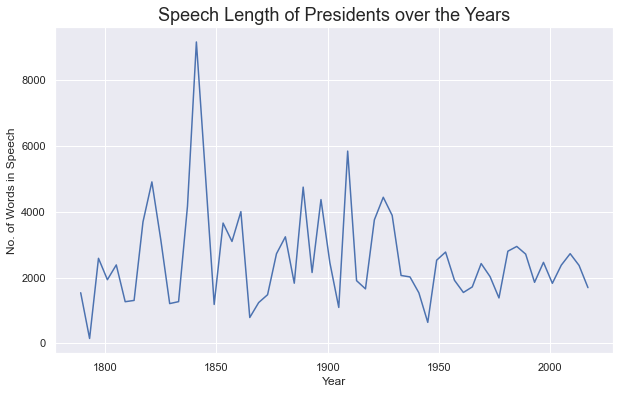

In [66]:
# To check if number of words in the speech became more over the years(not really)
speech_len = [len(speech_word) for speech_word in word_lst]
plt.figure(figsize = (10,6))
plt.plot(speech_year,speech_len)
plt.xlabel('Year')
plt.ylabel('No. of Words in Speech')
plt.title('Speech Length of Presidents over the Years', size = 18)
plt.show()

In [16]:
# For republicans and democrats the speech length
speech_len_df = pd.DataFrame([
    speech_year,
    speech_len,
    president_party['Party'].tolist()
]).T

speech_len_df.columns = ['Year','No. of Words in Speech','Party']
speech_len_df_shortlisted = speech_len_df[speech_len_df['Party'].isin(['Democratic','Republican'])]

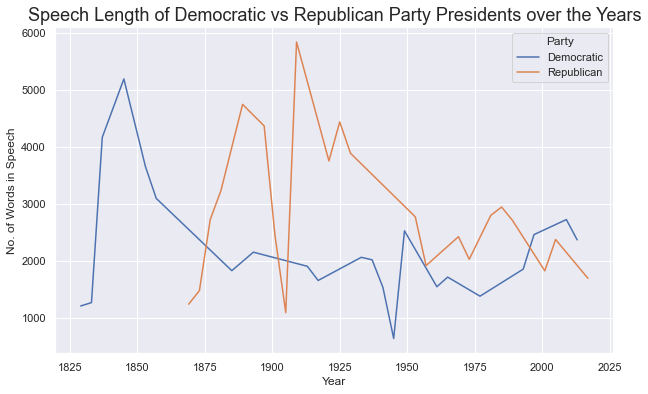

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (10,6))
p = sns.lineplot(x ='Year', y ='No. of Words in Speech', hue = 'Party', data = speech_len_df_shortlisted)
p.set_title('Speech Length of Democratic vs Republican Party Presidents over the Years', size = 18)
plt.show()

In [68]:
speech_len_df_shortlisted.groupby('Party')['No. of Words in Speech'].agg([np.mean,np.median]).round(0).astype(int)

,mean,median
Party,,
Democratic,2226,1962
Republican,2853,2718


In [19]:
demo_bool_indlst = list(np.where(speech_len_df['Party'] == 'Democratic')[0])
rep_bool_indlst = list(np.where(speech_len_df['Party']== 'Republican')[0])

In [20]:
# Most commonly mentioned people by Democratic parties
def get_entities_of_type(type_we_seek, entities):
    ents = [string for (string, tag) in entities if (tag == type_we_seek)] 
    # You can add new lines to the above line if you like
    print("Number of strings tagged as " + type_we_seek + " " + str(len(ents)))
    return ents

people_demo = [get_entities_of_type('PERSON', named_entities) for ind, named_entities in enumerate(ner_lst) if ind in demo_bool_indlst]
people_rep = [get_entities_of_type('PERSON', named_entities) for ind, named_entities in enumerate(ner_lst) if ind in rep_bool_indlst]

Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 2
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 2
Number of strings tagged as PERSON 1
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 1
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 1
Number of strings tagged as PERSON 1
Number of strings tagged as PERSON 7
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 1
Number of strings tagged as PERSON 4
Number of strings tagged as PERSON 2
Number of strings tagged as PERSON 5
Number of strings tagged as PERSON 6
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 1
Number of strings tagged as PERSON 2
Number of strings tagged as PERSON 0
Number of strings tagged as PERSON 1
N

In [21]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [22]:
people_demo = flatten(people_demo)

In [23]:
people_rep = flatten(people_rep)

In [24]:
# Clean the words of those non-alphanumeric parts
people_demo = [re.sub('[^0-9a-zA-Z]+','',people) for people in people_demo]
people_rep = [re.sub('[^0-9a-zA-Z]+','',people) for people in people_rep]

In [25]:
people_demo = [p for p in people_demo if p not in ['America','Americas']]
people_rep = [p for p in people_rep if p not in ['America','Americas']]

In [26]:
from collections import Counter
people_dict_demo=Counter(people_demo)
print("Number of unique person names: " + str(len(people_dict_demo)))
print(people_dict_demo)

Number of unique person names: 28
Counter({'ChiefJustice': 3, 'God': 3, 'Bush': 2, 'Ruler': 1, 'Divine': 1, 'Territory': 1, 'Hitherto': 1, 'Jefferson': 1, 'Hand': 1, 'Peabody': 1, 'Johnson': 1, 'Speaker': 1, 'Eisenhower': 1, 'Nixon': 1, 'Truman': 1, 'Divided': 1, 'JuliaColeman': 1, 'GeorgeWashington': 1, 'ThomasJefferson': 1, 'FranklinRoosevelt': 1, 'MartinLutherKings': 1, 'CardinalBernardin': 1, 'Normandy': 1, 'KheSahn': 1, 'Biden': 1, 'Americanis': 1, 'SenecaFalls': 1, 'Selma': 1})


In [27]:
people_dict_rep=Counter(people_rep)
print("Number of unique person names: " + str(len(people_dict_rep)))
print(people_dict_rep)

Number of unique person names: 60
Counter({'God': 8, 'ChiefJustice': 6, 'Speaker': 4, 'Bush': 4, 'Clinton': 4, 'AbrahamLincoln': 3, 'GeorgeWashington': 3, 'Jefferson': 3, 'ONeill': 2, 'ThomasJefferson': 2, 'Mathias': 2, 'Dole': 2, 'MajorityLeader': 2, 'Carter': 2, 'Obama': 2, 'FortSumter': 1, 'Grant': 1, 'DivineHand': 1, 'Webster': 1, 'Monroe': 1, 'Root': 1, 'PortoRico': 1, 'Northerners': 1, 'HolyWrit': 1, 'CalvinCoolidge': 1, 'Rigid': 1, 'IwoJima': 1, 'Dirksen': 1, 'Johnson': 1, 'Humphrey': 1, 'FranklinDelanoRoosevelt': 1, 'ArchibaldMacLeish': 1, 'Cook': 1, 'Eisenhower': 1, 'Hatfield': 1, 'Mondale': 1, 'Baker': 1, 'Moomaw': 1, 'WinstonChurchill': 1, 'JosephWarren': 1, 'BelleauWood': 1, 'Salerno': 1, 'MyPledge': 1, 'MartinTreptow': 1, 'ReverendClergy': 1, 'JohnStennis': 1, 'GillisLong': 1, 'Moon': 1, 'Adams': 1, 'Quayle': 1, 'Mitchell': 1, 'Wright': 1, 'Michael': 1, 'Reagan': 1, 'Gore': 1, 'JohnPage': 1, 'Cheney': 1, 'Roberts': 1, 'MichelleObama': 1, 'Creator': 1})


In [28]:
from PIL import Image
from wordcloud import WordCloud

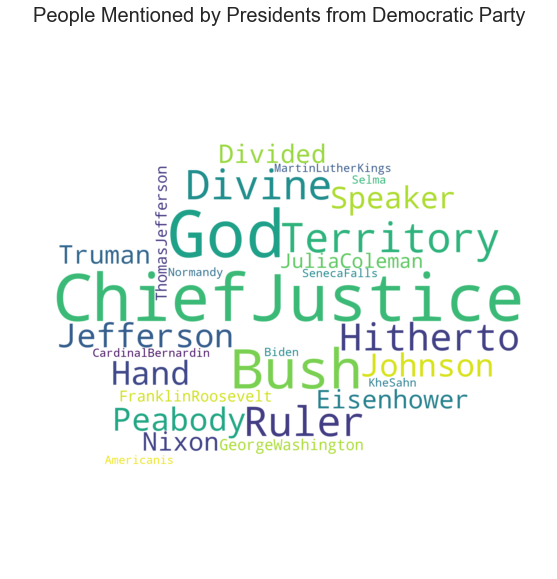

In [77]:
cloud_img_mask = np.array(Image.open("../images/comment.png"))
wordcloud = WordCloud(width=800, height=1600, background_color="white", mask=cloud_img_mask).generate_from_frequencies(people_dict_demo)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('People Mentioned by Presidents from Democratic Party', fontsize = 20)
plt.axis("off")
plt.show()

(-0.5, 2047.5, 2047.5, -0.5)

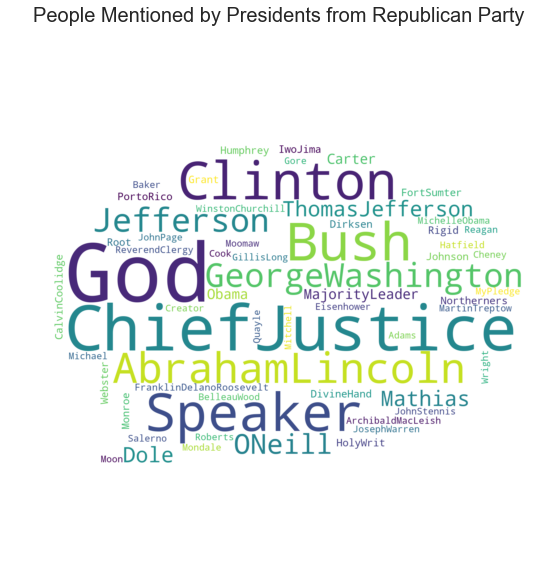

In [76]:
cloud_img_mask = np.array(Image.open("../images/comment.png"))
wordcloud = WordCloud(width=800, height=1600, background_color="white", mask=cloud_img_mask).generate_from_frequencies(people_dict_rep)
plt.figure(figsize=(10,10))
plt.title('People Mentioned by Presidents from Republican Party', fontsize = 20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

## Finding the most common Adj

In [31]:
pos_tagged_demo = [nltk.pos_tag(inaugural.words(inaugural.fileids()[ind])) for ind in demo_bool_indlst]
pos_tagged_rep = [nltk.pos_tag(inaugural.words(inaugural.fileids()[ind])) for ind in rep_bool_indlst]

In [32]:
adj_tag_demo = []
adj_tag_rep = []

for speech in pos_tagged_demo:
    for token,tag in speech:
        if tag == 'JJ':
            adj_tag_demo.append(token)
            

for speech in pos_tagged_rep:
    for token,tag in speech:
        if tag == 'JJ':
            adj_tag_rep.append(token)

In [33]:
# Clean tags
adj_tag_demo = [adj for adj in adj_tag_demo if adj.isalpha()]
adj_tag_rep = [adj for adj in adj_tag_rep if adj.isalpha()]

In [34]:
adj_dict_demo=Counter(adj_tag_demo)
print("Number of unique adj: " + str(len(adj_dict_demo)))
print(adj_dict_demo)


Number of unique adj: 964
Counter({'new': 113, 'great': 85, 'own': 85, 'other': 67, 'free': 64, 'public': 59, 'national': 53, 's': 52, 'American': 49, 'fellow': 46, 'good': 43, 'human': 40, 'common': 38, 'foreign': 34, 'many': 32, 'such': 30, 'political': 30, 'old': 30, 'present': 27, 'same': 25, 'true': 25, 'equal': 24, 'high': 22, 'domestic': 22, 'first': 22, 'strong': 21, 'whole': 19, 'powerful': 18, 'necessary': 18, 'moral': 18, 'constitutional': 17, 'last': 17, 'clear': 17, 'important': 16, 'few': 16, 'happy': 16, 'fair': 15, 'individual': 15, 'economic': 15, 'sacred': 14, 'vast': 14, 'practical': 14, 'independent': 14, 'different': 14, 'essential': 13, 'civil': 13, 'patriotic': 13, 'much': 13, 'mere': 13, 'personal': 13, 'long': 13, 'solemn': 12, 'only': 12, 'ready': 12, 'certain': 12, 'industrial': 12, 'proper': 11, 'military': 11, 'local': 11, 'full': 11, 'general': 11, 'ancient': 11, 'official': 10, 'real': 10, 'private': 10, 'natural': 10, 'complete': 10, 'mutual': 10, 'futur

In [35]:
adj_dict_rep=Counter(adj_tag_rep)
print("Number of unique adj: " + str(len(adj_dict_rep)))
print(adj_dict_rep)

Number of unique adj: 1081
Counter({'great': 145, 'new': 115, 'own': 99, 'other': 90, 'free': 87, 'such': 77, 'public': 76, 'American': 76, 'good': 58, 's': 54, 'national': 52, 'political': 49, 'many': 41, 'full': 36, 'necessary': 33, 'human': 33, 'common': 32, 'old': 32, 'economic': 32, 'same': 31, 'first': 31, 'important': 29, 'fellow': 29, 'much': 29, 'proper': 28, 'strong': 26, 'civil': 26, 'whole': 26, 'high': 25, 'local': 24, 'foreign': 24, 'large': 22, 'equal': 21, 'past': 21, 'present': 21, 'last': 21, 'possible': 20, 'international': 20, 'small': 20, 'true': 19, 'general': 19, 'industrial': 19, 'moral': 19, 'only': 18, 'social': 18, 'permanent': 17, 'constitutional': 16, 'popular': 16, 'young': 15, 'further': 15, 'certain': 15, 'ready': 15, 'supreme': 14, 'commercial': 14, 'special': 14, 'military': 14, 'effective': 13, 'long': 13, 'right': 13, 'united': 12, 'essential': 12, 'peaceful': 12, 'mutual': 12, 'able': 12, 'safe': 12, 'responsible': 12, 'little': 12, 'single': 12, 'f

(-0.5, 1079.5, 1079.5, -0.5)

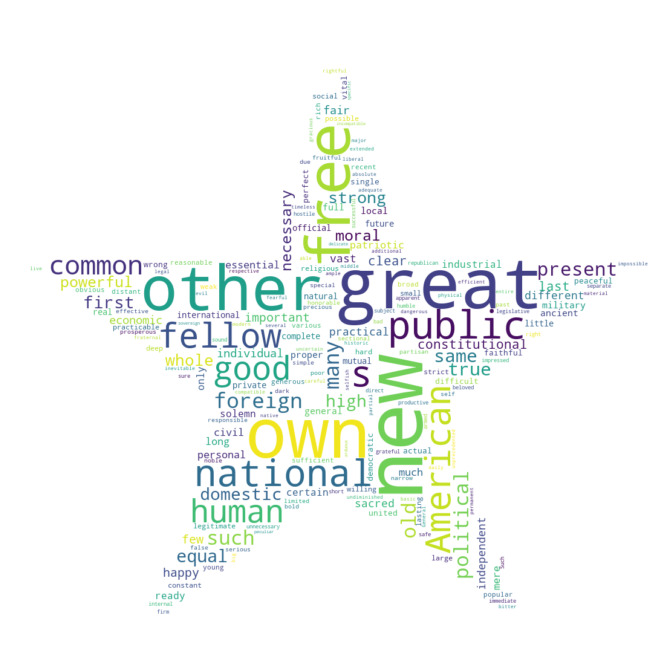

In [36]:
cloud_img_mask = np.array(Image.open("../images/star.png"))
wordcloud = WordCloud(width=800, height=1600, background_color="white", mask=cloud_img_mask).generate_from_frequencies(adj_dict_demo)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 1079.5, 1079.5, -0.5)

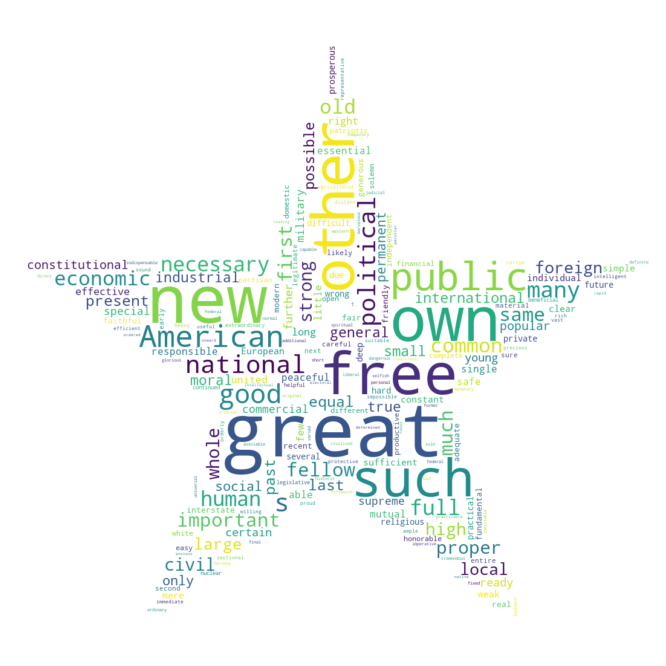

In [37]:
cloud_img_mask = np.array(Image.open("../images/star.png"))
wordcloud = WordCloud(width=800, height=1600, background_color="white", mask=cloud_img_mask).generate_from_frequencies(adj_dict_rep)
plt.figure(figsize=(16,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

The word cloud makes sense. Both parties uses adjectives related to great, new, own, free, american.

## Find topics within the speeches

* Check the nouns and diff of those
* Compare across time using ConditionalFreqDist
* Compare between parties also using ConditionalFreqDist

Keywords to consider:
* economy
* freedom
* china
* russia
* war
* poverty
* rights
* democracy
* GDP
* inflation

In [38]:
# Find the common nouns in both type of presidential speeches
n_tag_demo = []
n_tag_rep = []

for speech in pos_tagged_demo:
    for token,tag in speech:
        if (tag == 'NN' or tag == 'NNS'):
            n_tag_demo.append(token)
            

for speech in pos_tagged_rep:
    for token,tag in speech:
        if (tag == 'NN' or tag == 'NNS'):
            n_tag_rep.append(token)

In [39]:
# Clean tags
n_tag_demo = [n for n in n_tag_demo if n.isalpha() and len(n) > 1]
n_tag_rep = [n for n in n_tag_rep if n.isalpha() and len(n) > 1]

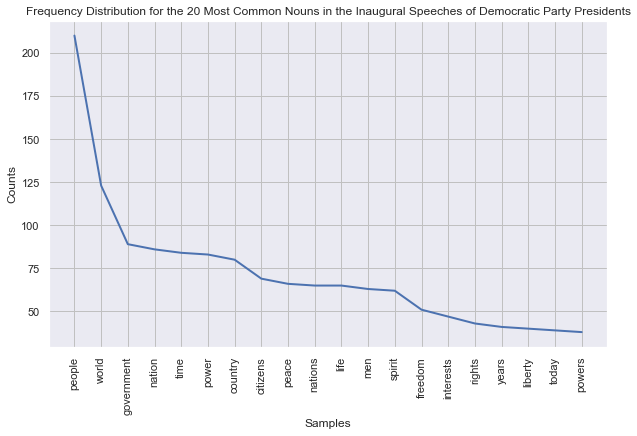

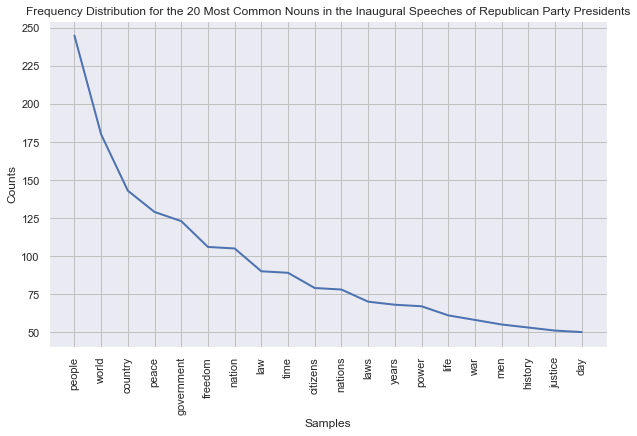

<AxesSubplot:title={'center':'Frequency Distribution for the 20 Most Common Nouns in the Inaugural Speeches of Republican Party Presidents'}, xlabel='Samples', ylabel='Counts'>

In [69]:
from nltk.probability import FreqDist
plt.figure(figsize = (10,6))
fdist1 = FreqDist(n_tag_demo)
fdist1.plot(20,title='Frequency Distribution for the 20 Most Common Nouns in the Inaugural Speeches of Democratic Party Presidents')

plt.figure(figsize = (10,6))
fdist2 = FreqDist(n_tag_rep)
fdist2.plot(20,title='Frequency Distribution for the 20 Most Common Nouns in the Inaugural Speeches of Republican Party Presidents')

In [41]:
huge_stop_word_lst = ["a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are", "aren", "aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "can", "couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "hadn't", "has", "hasn", "hasn't", "have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i", "if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me", "mightn", "mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not", "now", "o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own", "re", "s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so", "some", "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there", "these", "they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn", "wasn't", "we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why", "will", "with", "won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm", "i've", "let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've", "we'd", "we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afterwards", "ah", "almost", "alone", "along", "already", "also", "although", "always", "among", "amongst", "announce", "another", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "arent", "arise", "around", "aside", "ask", "asking", "auth", "available", "away", "awfully", "b", "back", "became", "become", "becomes", "becoming", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "believe", "beside", "besides", "beyond", "biol", "brief", "briefly", "c", "ca", "came", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "couldnt", "date", "different", "done", "downwards", "due", "e", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "former", "formerly", "forth", "found", "four", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "happens", "hardly", "hed", "hence", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hi", "hid", "hither", "home", "howbeit", "however", "hundred", "id", "ie", "im", "immediate", "immediately", "importance", "important", "inc", "indeed", "index", "information", "instead", "invention", "inward", "itd", "it'll", "j", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "made", "mainly", "make", "makes", "many", "may", "maybe", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "moreover", "mostly", "mr", "mrs", "much", "mug", "must", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "nobody", "non", "none", "nonetheless", "noone", "normally", "nos", "noted", "nothing", "nowhere", "obtain", "obtained", "obviously", "often", "oh", "ok", "okay", "old", "omitted", "one", "ones", "onto", "ord", "others", "otherwise", "outside", "overall", "owing", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "said", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "shed", "shes", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "sufficiently", "suggest", "sup", "sure", "take", "taken", "taking", "tell", "tends", "th", "thank", "thanks", "thanx", "thats", "that've", "thence", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "theyd", "theyre", "think", "thou", "though", "thoughh", "thousand", "throug", "throughout", "thru", "thus", "til", "tip", "together", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "unfortunately", "unless", "unlike", "unlikely", "unto", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "wasnt", "way", "wed", "welcome", "went", "werent", "whatever", "what'll", "whats", "whence", "whenever", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "whim", "whither", "whod", "whoever", "whole", "who'll", "whomever", "whos", "whose", "widely", "willing", "wish", "within", "without", "wont", "words", "world", "wouldnt", "www", "x", "yes", "yet", "youd", "youre", "z", "zero", "a's", "ain't", "allow", "allows", "apart", "appear", "appreciate", "appropriate", "associated", "best", "better", "c'mon", "c's", "cant", "changes", "clearly", "concerning", "consequently", "consider", "considering", "corresponding", "course", "currently", "definitely", "described", "despite", "entirely", "exactly", "example", "going", "greetings", "hello", "help", "hopefully", "ignored", "inasmuch", "indicate", "indicated", "indicates", "inner", "insofar", "it'd", "keep", "keeps", "novel", "presumably", "reasonably", "second", "secondly", "sensible", "serious", "seriously", "sure", "t's", "third", "thorough", "thoroughly", "three", "well", "wonder", "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "co", "op", "research-articl", "pagecount", "cit", "ibid", "les", "le", "au", "que", "est", "pas", "vol", "el", "los", "pp", "u201d", "well-b", "http", "volumtype", "par", "0o", "0s", "3a", "3b", "3d", "6b", "6o", "a1", "a2", "a3", "a4", "ab", "ac", "ad", "ae", "af", "ag", "aj", "al", "an", "ao", "ap", "ar", "av", "aw", "ax", "ay", "az", "b1", "b2", "b3", "ba", "bc", "bd", "be", "bi", "bj", "bk", "bl", "bn", "bp", "br", "bs", "bt", "bu", "bx", "c1", "c2", "c3", "cc", "cd", "ce", "cf", "cg", "ch", "ci", "cj", "cl", "cm", "cn", "cp", "cq", "cr", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d2", "da", "dc", "dd", "de", "df", "di", "dj", "dk", "dl", "do", "dp", "dr", "ds", "dt", "du", "dx", "dy", "e2", "e3", "ea", "ec", "ed", "ee", "ef", "ei", "ej", "el", "em", "en", "eo", "ep", "eq", "er", "es", "et", "eu", "ev", "ex", "ey", "f2", "fa", "fc", "ff", "fi", "fj", "fl", "fn", "fo", "fr", "fs", "ft", "fu", "fy", "ga", "ge", "gi", "gj", "gl", "go", "gr", "gs", "gy", "h2", "h3", "hh", "hi", "hj", "ho", "hr", "hs", "hu", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ic", "ie", "ig", "ih", "ii", "ij", "il", "in", "io", "ip", "iq", "ir", "iv", "ix", "iy", "iz", "jj", "jr", "js", "jt", "ju", "ke", "kg", "kj", "km", "ko", "l2", "la", "lb", "lc", "lf", "lj", "ln", "lo", "lr", "ls", "lt", "m2", "ml", "mn", "mo", "ms", "mt", "mu", "n2", "nc", "nd", "ne", "ng", "ni", "nj", "nl", "nn", "nr", "ns", "nt", "ny", "oa", "ob", "oc", "od", "of", "og", "oi", "oj", "ol", "om", "on", "oo", "oq", "or", "os", "ot", "ou", "ow", "ox", "oz", "p1", "p2", "p3", "pc", "pd", "pe", "pf", "ph", "pi", "pj", "pk", "pl", "pm", "pn", "po", "pq", "pr", "ps", "pt", "pu", "py", "qj", "qu", "r2", "ra", "rc", "rd", "rf", "rh", "ri", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "rv", "ry", "s2", "sa", "sc", "sd", "se", "sf", "si", "sj", "sl", "sm", "sn", "sp", "sq", "sr", "ss", "st", "sy", "sz", "t1", "t2", "t3", "tb", "tc", "td", "te", "tf", "th", "ti", "tj", "tl", "tm", "tn", "tp", "tq", "tr", "ts", "tt", "tv", "tx", "ue", "ui", "uj", "uk", "um", "un", "uo", "ur", "ut", "va", "wa", "vd", "wi", "vj", "vo", "wo", "vq", "vt", "vu", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y2", "yj", "yl", "yr", "ys", "yt", "zi", "zz"]

# We can use a stoplist and a list of punctuation and digits to be removed.

nltk.download('stopwords')
from nltk.corpus import stopwords
custom_additional_stopwords = ['a',
 'about',
 'actually',
 'almost',
 'also',
 'although',
 'always',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'became',
 'become',
 'but',
 'by',
 'can',
 'could',
 'did',
 'do',
 'does',
 'each', 'every',
 'either',
 'else',
 'for',
 'from',
 'had',
 'has',
 'have',
 'hence',
 'how',
 'i',
 'if',
 'in',
 'is',
 'it',
 'its',
 'just',
 'let', 'make',
 'may',
 'maybe',
 'me', 'meanwhile','meantime',
 'might',
 'mine',
 'must',
 'my',
 'mine',
 'must',
 'my',
 'neither',
 'nor',
 'not', 'never',
 'of',
 'oh', 'one',
 'ok', 'something','sometimes',
 'when',
 'where',
 'whereas',
 'wherever',
 'whenever',
 'whether',
 'which',
 'while',
 'who',
 'whom',
 'whoever',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would','shall','upon','us',
 'yes',
 'yet',
 'you',
 'your']

custom_additional_stopwords = custom_additional_stopwords + huge_stop_word_lst
custom_additional_stopwords = list(np.unique(custom_additional_stopwords))

remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits)) 

for add_stopwords in custom_additional_stopwords:
    remove_these.add(add_stopwords)

word_lst_demo = [word_lst[i] for i in demo_bool_indlst]
word_lst_rep = [word_lst[i] for i in rep_bool_indlst]

purified_word_lst_demo = [re.sub('[^0-9a-zA-Z]+','',token.lower()) for speech in word_lst_demo for token in speech 
                     if (token.lower() not in remove_these) & (len(re.sub('[^0-9a-zA-Z]+','',token.lower())) >= 1)] #& (token.lower().isalnum())]

purified_word_lst_rep = [re.sub('[^0-9a-zA-Z]+','',token.lower()) for speech in word_lst_rep for token in speech 
                     if (token.lower() not in remove_these) & (len(re.sub('[^0-9a-zA-Z]+','',token.lower())) >= 1)]# & (token.lower().isalnum())]



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


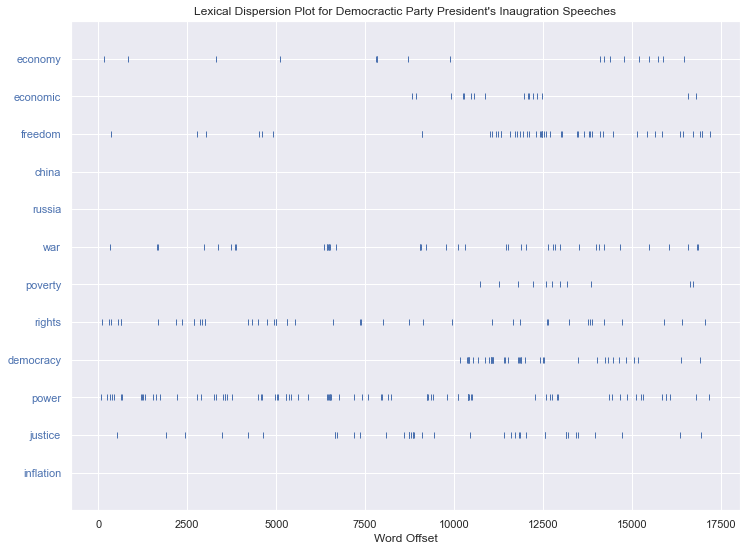

In [42]:
# We download the appropriate library
from nltk.draw.dispersion import dispersion_plot

# The following command can be used to increase the size of the plot using width and height specifications
plt.figure(figsize=(12, 9))

# Set the words we wish to look for as targets 
targets=[
'economy', 'economic',
'freedom',
'china',
'russia',
'war',
'poverty',
'rights',
'democracy',
'power',
'justice',
'inflation',

]

# and create the plot
dispersion_plot(purified_word_lst_demo, targets, ignore_case=True, title="Lexical Dispersion Plot for Democractic Party President's Inaugration Speeches")


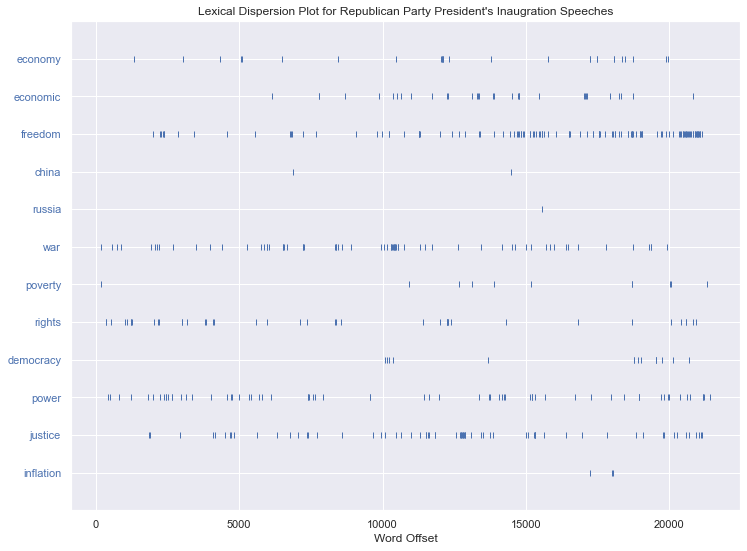

In [43]:
# The following command can be used to increase the size of the plot using width and height specifications
plt.figure(figsize=(12, 9))

targets=[
'economy', 'economic',
'freedom',
'china',
'russia',
'war',
'poverty',
'rights',
'democracy',
'power',
'justice',
'inflation',

]

# and create the plot
dispersion_plot(purified_word_lst_rep, targets, ignore_case=True, title="Lexical Dispersion Plot for Republican Party President's Inaugration Speeches")


In [44]:
word_year_lst_demo = []
word_year_lst_rep = []

demo_temp = []
rep_temp = []

for speech in word_lst_demo:
    demo_temp.append([re.sub('[^0-9a-zA-Z]+','',token.lower()) for token in speech 
                      if (token.lower() not in remove_these) & (len(re.sub('[^0-9a-zA-Z]+','',token.lower())) >= 1)]) #& (token.lower().isalnum())])

word_year_lst_demo = list(zip(demo_temp,[speech_year[ind] for ind in demo_bool_indlst]))
                                  
for speech in word_lst_rep:
    rep_temp.append([re.sub('[^0-9a-zA-Z]+','',token.lower()) for token in speech 
                     if (token.lower() not in remove_these) & (len(re.sub('[^0-9a-zA-Z]+','',token.lower())) >= 1)]) #& (token.lower().isalnum())])
            
            
word_year_lst_rep = list(zip(rep_temp,[speech_year[ind] for ind in rep_bool_indlst]))

In [45]:
targets=[
'economy', 'economic',
'freedom',
'war', 
'poverty',
'rights',
'democracy',
'power',
'peace',
'justice'
]

sl_demo_words_final = []
for target in targets:
    for speech, year in word_year_lst_demo:
        sl_demo_words = [word for word in speech if word == target]
        sl_demo_words_final += list(zip(sl_demo_words, [year]*len(sl_demo_words)))
        
sl_rep_words_final = []
for target in targets:
    for speech, year in word_year_lst_rep:
        sl_rep_words = [word for word in speech if word == target]
        sl_rep_words_final += list(zip(sl_rep_words, [year]*len(sl_rep_words)))

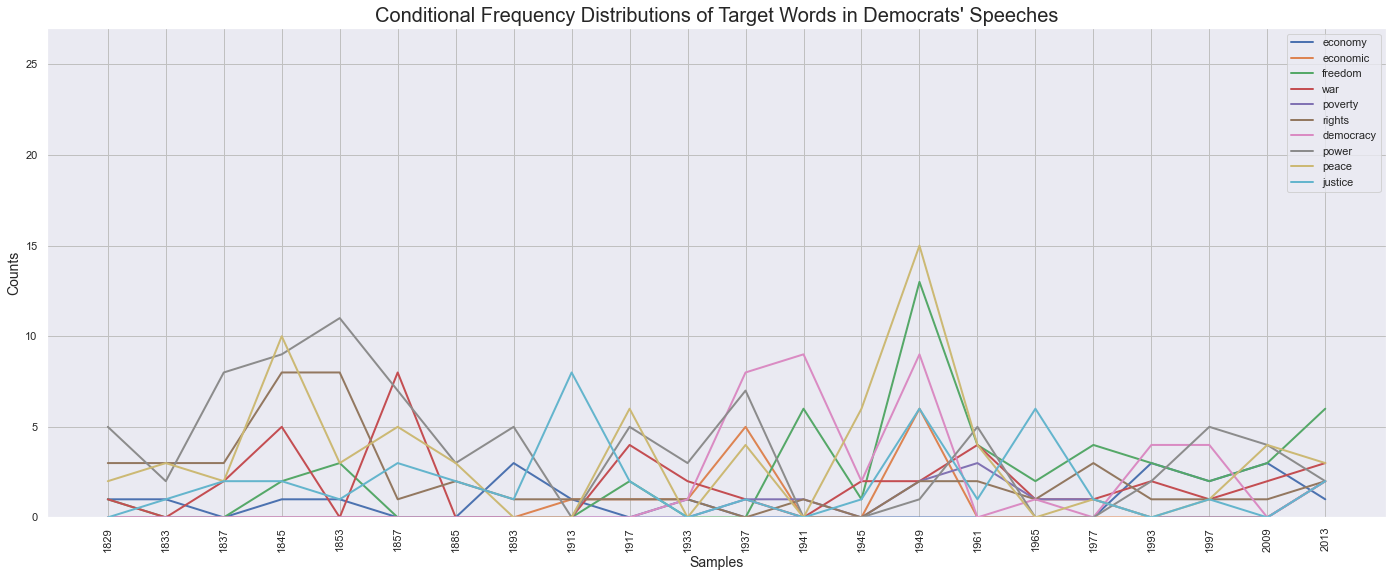

In [46]:
from nltk.probability import ConditionalFreqDist

# The next line of code sets the figure size
plt.rcParams["figure.figsize"] = (24, 9)

cfd = nltk.ConditionalFreqDist(sl_demo_words_final)

ax = plt.axes()

ax.set_yticks([0,5,10,15,20,25])
ax.set_ylim(0,27)
ax.set_title("Conditional Frequency Distributions of Target Words in Democrats' Speeches", fontsize = 20)
ax.set_ylabel('Counts', fontsize = 14)
ax.set_xlabel('Samples', fontsize = 14)

plt.draw() # update the plot
plt.savefig('cfd.png') # save the updated figure

p = cfd.plot()
plt.show()

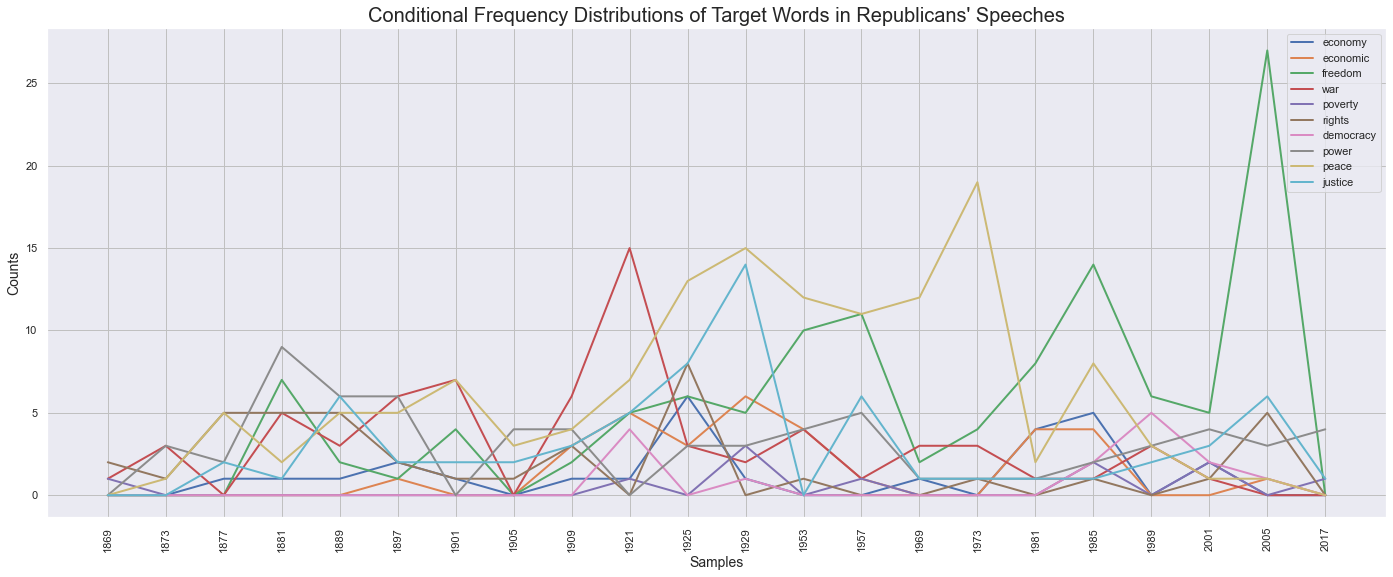

In [47]:
cfd = nltk.ConditionalFreqDist(sl_rep_words_final)

ax = plt.axes()
ax.set_yticks([0,5,10,15,20,25])
ax.set_title("Conditional Frequency Distributions of Target Words in Republicans' Speeches", fontsize = 20)
ax.set_ylabel('Counts', fontsize = 14)
ax.set_xlabel('Samples', fontsize = 14)

cfd.plot()
plt.show()

The speeches from presidents of both parties have emphasized more on freedom in recent few decades with the republicans being more focussed on freedom than the democrats. There were more mentions of war by democrats than republicans in the last 3 decades. This could be a deliberate choice of words since the recent wars US engaged in happened during the presidential terms of republicans and this controversial topic implied by the word "war" could have led republicans to stay clear of this

There were also significantly more mention of the terms rights by democrats than republicans and this appears in line with the democratic party's focus in human rights and equal opportunities.

Looking back at the last century (1900 onwards), it is interesting to note that peace has been mentioned a lot more times in periods of uncertainty in the presidential speeches from both parties, for instance during the speech of 1917 during World War 1 (1914 - 1918), 1920s where turf wars among rival gangs were prevalent in the USA and 1929 stock market crash, 1945 through 1973, when second world war happened (1942-1945), Korean War (1950-1953) and Vietnam War(1955-1975). In periods of relative peace from 1980s onwards, it appears that presidents from both parties made fewer mention of this word and interestingly, the presidents from the Republican party appeared to have made a lot fewer mentions of peace compared to their predecessors while there is a uptick in this usage by the presidents from the Democratic party in recent years (2009, 2013) due to Obama Administration.

Another interesting observation is that presidential inauguration speeches from both parties tend not to really mention much about economy-related matters since both words (economy and economic) are not mentioned as much as the other target words.

## Simple Topic modelling

In [48]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [49]:
sp = spacy.load('en_core_web_sm')

In [50]:
def lemmatize_words_in_docs(lst_of_lst):
    inner_lst = []
    outer_lst = []

    for doc in lst_of_lst:
        for i in doc:
            _ = sp(i)
            inner_lst.append(_[0].lemma_)
        outer_lst.append(inner_lst)

        # Clear inner_lst
        inner_lst = []
        
    return outer_lst


In [51]:
# Re-use rep_temp and demo_temp

# Lemmatize rep_temp
rep_temp = lemmatize_words_in_docs(rep_temp)

words_rep = corpora.Dictionary(rep_temp)

corpus = [words_rep.doc2bow(doc) for doc in rep_temp]

lda_model_rep = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=words_rep,
                                           num_topics=5, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [52]:
# Re-use rep_temp and demo_temp

# Lemmatize demo_temp
demo_temp = lemmatize_words_in_docs(demo_temp)

words_demo = corpora.Dictionary(demo_temp)

corpus2 = [words_demo.doc2bow(doc) for doc in demo_temp]

lda_model_demo = gensim.models.ldamodel.LdaModel(corpus=corpus2,
                                           id2word=words_demo,
                                           num_topics=5, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [53]:
pprint(lda_model_demo.print_topics(num_words = 10))

[(0,
  '0.016*"nation" + 0.009*"people" + 0.009*"life" + 0.009*"great" + '
  '0.009*"man" + 0.008*"spirit" + 0.006*"government" + 0.006*"thing" + '
  '0.005*"year" + 0.005*"purpose"'),
 (1,
  '0.017*"people" + 0.013*"government" + 0.008*"public" + 0.008*"citizen" + '
  '0.005*"american" + 0.005*"interest" + 0.005*"service" + '
  '0.005*"constitution" + 0.004*"law" + 0.004*"national"'),
 (2,
  '0.014*"government" + 0.013*"state" + 0.010*"people" + 0.009*"power" + '
  '0.008*"country" + 0.007*"nation" + 0.007*"union" + 0.006*"great" + '
  '0.005*"constitution" + 0.005*"duty"'),
 (3,
  '0.001*"people" + 0.001*"government" + 0.001*"nation" + 0.001*"country" + '
  '0.001*"state" + 0.000*"great" + 0.000*"power" + 0.000*"time" + 0.000*"man" '
  '+ 0.000*"citizen"'),
 (4,
  '0.014*"nation" + 0.012*"people" + 0.010*"america" + 0.008*"time" + '
  '0.007*"man" + 0.007*"today" + 0.007*"work" + 0.007*"government" + '
  '0.006*"great" + 0.006*"change"')]


In [54]:
pprint(lda_model_rep.print_topics(num_words = 10))

[(0,
  '0.001*"government" + 0.001*"people" + 0.000*"great" + 0.000*"nation" + '
  '0.000*"country" + 0.000*"law" + 0.000*"state" + 0.000*"america" + '
  '0.000*"citizen" + 0.000*"work"'),
 (1,
  '0.012*"country" + 0.011*"government" + 0.010*"great" + 0.009*"nation" + '
  '0.009*"people" + 0.006*"party" + 0.005*"peace" + 0.005*"state" + '
  '0.005*"law" + 0.004*"political"'),
 (2,
  '0.012*"people" + 0.011*"nation" + 0.011*"america" + 0.009*"country" + '
  '0.009*"freedom" + 0.008*"great" + 0.007*"government" + 0.006*"time" + '
  '0.006*"citizen" + 0.006*"law"'),
 (3,
  '0.011*"government" + 0.010*"people" + 0.009*"nation" + 0.008*"great" + '
  '0.006*"america" + 0.006*"peace" + 0.006*"law" + 0.006*"man" + 0.005*"time" '
  '+ 0.005*"state"'),
 (4,
  '0.013*"government" + 0.013*"people" + 0.009*"law" + 0.008*"state" + '
  '0.007*"nation" + 0.006*"great" + 0.006*"peace" + 0.006*"public" + '
  '0.004*"american" + 0.004*"progress"')]


## Simple Sentiment Analysis

In [55]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [56]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [57]:
demo_polarity = []
demo_subj = []

for i in demo_bool_indlst:
    demo_polarity.append(nlp(inaugural.raw(inaugural.fileids()[i]))._.polarity)
    demo_subj.append(nlp(inaugural.raw(inaugural.fileids()[i]))._.subjectivity)

In [58]:
rep_polarity = []
rep_subj = []

for i in rep_bool_indlst:
    rep_polarity.append(nlp(inaugural.raw(inaugural.fileids()[i]))._.polarity)
    rep_subj.append(nlp(inaugural.raw(inaugural.fileids()[i]))._.subjectivity)

In [59]:
overall_polarity = []
overall_subj = []
for i in range(len(inaugural.fileids())):
    overall_polarity.append(nlp(inaugural.raw(inaugural.fileids()[i]))._.polarity)
    overall_subj.append(nlp(inaugural.raw(inaugural.fileids()[i]))._.subjectivity)

In [60]:
np.mean(demo_polarity), np.std(demo_polarity)

(0.1531987827747083, 0.036279087503064154)

In [61]:
np.mean(demo_subj)

0.4890497019385656

In [62]:
np.mean(rep_polarity), np.std(rep_polarity)

(0.17477406669115758, 0.022762770481687584)

In [63]:
np.mean(rep_subj)

0.4939056864309757

In [64]:
np.mean(overall_polarity)

0.16188654750471826

In [65]:
np.mean(overall_subj)

0.48301163851026807